# Reto: procesando un dataset

#### Natasha Seelam, PhD
#### Head of AI/ML Research @ MindsDB

**Agradecimientos especiales: Dr. Dariusz K. Murakowski**

Hola, esta notebook servirá como tu guía para preparar datos y crear visualizaciones simples que te servirán para entrenar tu primer modelo de machine learning.

## 0: Descargar el dataset

El dataset que utilizaremos es de [Kaggle](https://www.kaggle.com/), un gran lugar para conseguir datasets para tus estudios en ciencia de datos e inteligencia artificial.

El dataset es sobre diabetes. Debes descargarlo [aquí](https://www.kaggle.com/mathchi/diabetes-data-set) en Kaggle. El objetivo de este dataset es predecir, dada otra información médica, si alguien tiene la enfermedad.

Como primer paso asegúrate de descargarlo y guardalo en una carpeta llamada `db` dentro de tu carpeta `My Drive` en tu Google Drive.

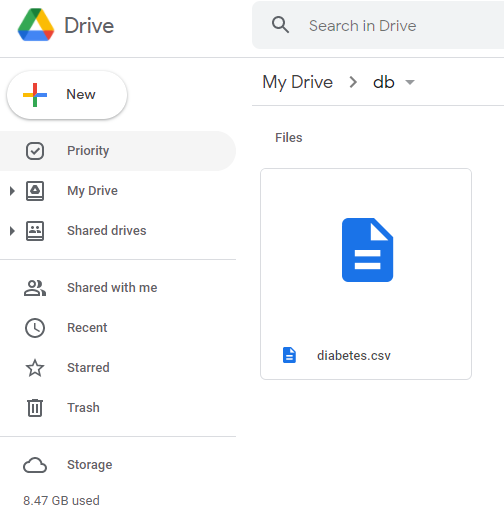

## 1: Instalación de librerías y configuración inicial

Utilizaremos **numpy** para manejo numérico, **Pandas** para la manipulación de los datos, **matplotlib** para visualizaciones y **drive** para nuestro sistema de archivos en Colab.

In [1]:
# Paquetes numéricos
import numpy as np

# DataFrames/Procesamiento
import pandas as pd

# Gráficas
import matplotlib.pyplot as plt

## 2: Cargando los datos

¡Excelente! Es momento de cargar el dataset comenzando a utilizar Pandas. Recuerda que para este curso ya debes manejar esta librería y esta parte servirá como un repaso para que tengas todo para preparar tu modelo de machine learning.

Usa el método `read_csv()` para leer y cargar el archivo csv del dataset en un DataFrame.

Usa el método `head()` para ver una previsualización del contenido del DataFrame.

In [2]:
# Leer y cargar el CSV
data = pd.read_csv("diabetes.csv")

# Ver qué hay en el DataFrame
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
unicos =list(data['Insulin'].unique())

sorted(unicos)

[0,
 14,
 15,
 16,
 18,
 22,
 23,
 25,
 29,
 32,
 36,
 37,
 38,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 94,
 95,
 96,
 99,
 100,
 105,
 106,
 108,
 110,
 112,
 114,
 115,
 116,
 119,
 120,
 122,
 125,
 126,
 127,
 128,
 129,
 130,
 132,
 135,
 140,
 142,
 144,
 145,
 146,
 148,
 150,
 152,
 155,
 156,
 158,
 159,
 160,
 165,
 166,
 167,
 168,
 170,
 171,
 175,
 176,
 178,
 180,
 182,
 183,
 184,
 185,
 188,
 190,
 191,
 192,
 193,
 194,
 196,
 200,
 204,
 205,
 207,
 210,
 215,
 220,
 225,
 228,
 230,
 231,
 235,
 237,
 240,
 245,
 249,
 250,
 255,
 258,
 265,
 270,
 271,
 272,
 274,
 275,
 277,
 278,
 280,
 284,
 285,
 291,
 293,
 300,
 304,
 310,
 318,
 321,
 325,
 326,
 328,
 330,
 335,
 342,
 360,
 370,
 375,
 387,
 392,
 402,
 415,
 440,
 465,
 474,
 478,
 480,
 485,
 495,
 510,

### 2a: Entender los datos - tipos

Podemos entender los tipos de datos de nuestro modelo. Pandas usa `dtypes` para identificar cada columna.

**Nota:** En algunos casos los datos categóricos no se indicarán de manera obvia y tendrás que usar tu criterio de lo que conoces del dataset para determinar si el moldeado es apropiado.

- **int64** representa enteros. Los enteros sirven cuando se trata de etiquetar algo, o se tienen grupos discretos. Por ejemplo, alguien puede tener 1 o 2 hijos, pero no 1.5 hijos.

También sirven para representar una categoría de mapeo. Por ejemplo, imagina que tienes 3 ciudades donde "1" significa "New York City", "2" significa "San Francisco" y "3" significa "Philadelphia".

- **float64** representarn valores numéricos de punto flotante. Estos sirven para representar valores continuos, por ejemplo BMI o insulina, donde decimales/fracciones son permitidas.

In [3]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### 2a: Preguntas del reto

A partir de las siguientes preguntas, debes identificar el tipo de datos que se usaría en cada situación. Deja tus resultados en los comentarios de la clase donde encontraste este notebook.

**Pregunta 1** <br>

Tienes un conjunto de datos de información de ventas sobre equipos electrónicos. Una de las columnas del conjunto de datos describe qué es el producto: tableta, teléfono inteligente, TV, computadora. ¿Qué tipo de datos es este? <br>

**Pregunta 2** <br>
A partir del mismo conjunto de datos de equipos electrónicos anterior, tienes información sobre el precio de cada artículo. ¿Qué tipo de datos es este? <br>

**Pregunta 3** <br>
Tienes información sobre el kilometraje (distancia recorrida) de varios automóviles en un concesionario. ¿Qué tipo de información es esta? <br>


### 2b: Entender los datos - valores faltantes

Antes de entrar al análisis preliminar revisa que no haya ningún valor faltante. Suelen indicarse como "NaN" o "Not a Number".

Usa el método `dropna()` para revisar si existen filas que no deban ser contadas.

**Nota:** `dropna()` removerá la fila si una sola columna individual tiene un feature faltante. De forma alternativa puedes especificar si este es el acercamiento indicado, o si quieres eliminar solo filas donde falte toda la información de la columna.

In [4]:
print("Número original de datapoints\n", data.shape) # Filas x Columnas

# Elimina cualquier valor faltante y remplazarlos hacia la variable de los datos
data = data.dropna()

# Comprueba la nueva forma (shape)
print("Número actualizado de datapoints\n", data.shape) # Filas x Columnas


Número original de datapoints
 (768, 9)
Número actualizado de datapoints
 (768, 9)


Como puedes observar, no hay valores faltantes, sugeriendo que es un dataset completo. Tenemos 768 filas, o muestras de datos, y 9 columnas o descriptores de esas muestras.

## 3: Representando patrones en tus datos

Dado nuestro dataset queremos ser capaces de decir si alguien tiene o no diabetes, indicado por la columna *outcome*.

Un **1** indica que el paciente **tiene diabetes**, donde **0** sugiere que **no la tiene**. Queremos aprender si las condiciones pre-existentes (age, blood-pressure, insulin, BMI) pueden contribuir a la diabetes.

Usaremos histogramas y gráficas de dispersión para ver cómo se comportan los grupos/población de nuestros datos. Es bueno hacer esto antes de construir un modelo.


### 3a: Representando patrones en tus datos - histogramas



Primero revisa las distribuciones de frecuencia. Para esto utilizarás un **histograma**.

Un histograma usa **bins** o límites de un valor numérico. Contamos cuántas filas caen dentro de los límites superior e inferios de cada bin y esto crea la distribución.

Pandas puede automatizar la creación de histogramas para no contar desde cero. Puedes darle el número de bins o esquinas de los bins (el criterio para límites inferior y superior).

Para nuestro caso utiliza el predeterminado (que generalmente es 10 bins).

Dado que queremos aprender el estado de si la persona tiene o no diabetes, podemos preguntar si nuestros datos están bien distribuidos en valores de 1 o 0 para el `outcome`. Necesitamos clases igualmente balanceadas para hacer predicciones decentes.

Revisa esto con la gráfica de barras resultado del código siguiente:

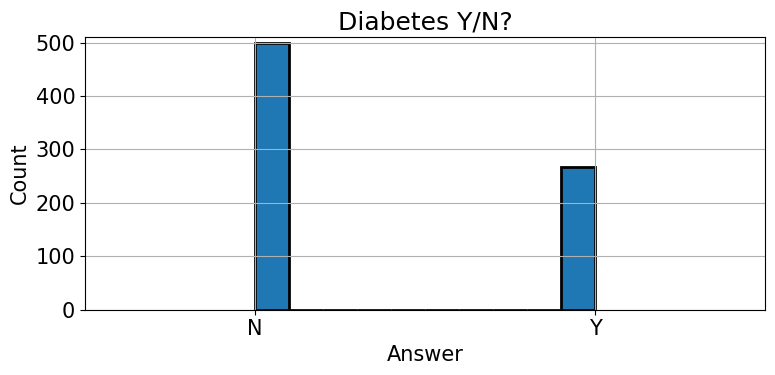

In [22]:
# Ajustar el tamaño de fuente.
plt.rcParams['font.size'] = 15

# Crear una figura y ajusta su tamaño.
f = plt.figure(figsize=(8,4))

# Crear un subplot o subtrama - al ser una sola figura es 1,1,1.
ax = f.add_subplot(1,1,1)

# Gráfica tus datos usando 'hist'. Pasa el objeto 'ax' a Pandas. Agrega un borde negro con un groso de 2.
data["Outcome"].hist(ax=ax, edgecolor='black', linewidth=2)

# Establece los límites en el eje x.
ax.set_xlim([-0.5, 1.5])

# Establece la frecuencia de tick. Tenemos 0 y 1 que corresponden a Sí y No respectivamente.
ax.set_xticks([0, 1])

# Etiquetar xtick labels.
ax.set_xticklabels(["N", "Y"])

# Crea el título.
ax.set_title("Diabetes Y/N?")

# Establece la etiqueta del eje X.
ax.set_xlabel("Answer")

# Establece la etiqueta del eje Y.
ax.set_ylabel("Count")

# Establece los límites superior/inferior del eje y.
ax.set_ylim([0, 510])

# Mace que las cosas sean bonitas, no es necesario, pero se ajusta al tamaño de la figura.
f.tight_layout()

De lo anterior, podemos ver que tenemos más "No" que "Sí", lo que significa que hay más personas sin diabetes en este conjunto de muestra que con diabetes.


Intentemos esto con una columna más complicada, como la edad. Nos gustaría ver el rango de edad de los pacientes con los que estamos trabajando. Esto puede deberse a que los pacientes mayores y los más jóvenes tienen necesidades médicas diferentes.

Por ejemplo, podemos usar un histograma para observar específicamente la edad de nuestros pacientes:

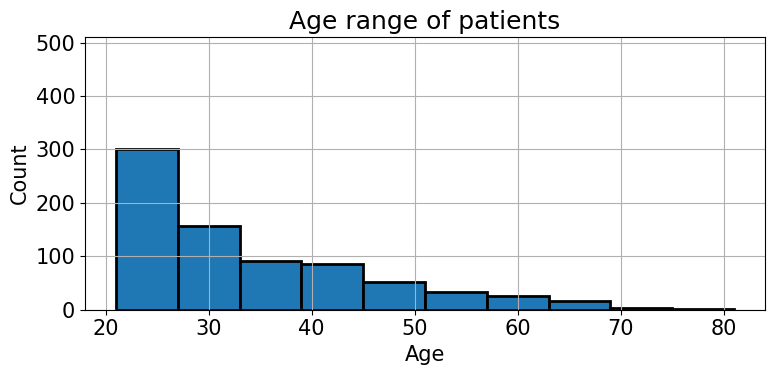

In [23]:
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
data["Age"].hist(ax=ax, edgecolor='black', linewidth=2)
ax.set_title("Age range of patients")
ax.set_ylim([0, 510])
ax.set_xlabel("Age")
ax.set_ylabel("Count")
f.tight_layout()

Si resolviste lo anterior, la mayoría de nuestros pacientes parecen tener entre 20 y 40 años. Algunos son mayores. Es posible que deseemos probar diferentes valores de bin.


### 3a: Ejercicio del reto 1
Prueba con diferentes valores de anchos de `bins` para realizar el histograma anterior. ¿Cómo harías esta gráfica? Escribe tu código respuesta abajo. Usa un límite de y (`set_ylim`) de $[0, 510]$.

Pista:
```
binvalues = [20, 25, 30, 35, 40, 85]
bins = binvalues
```

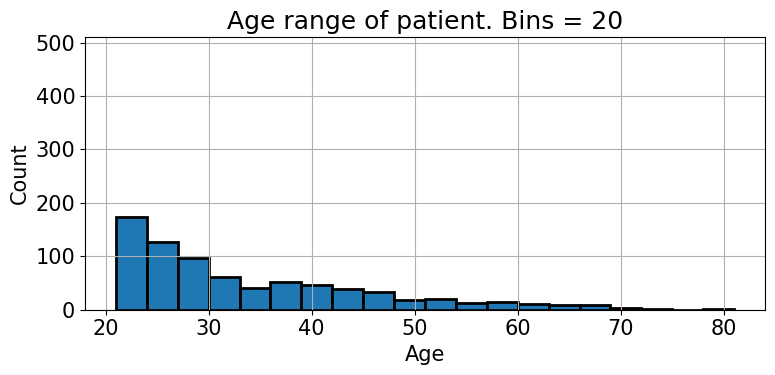

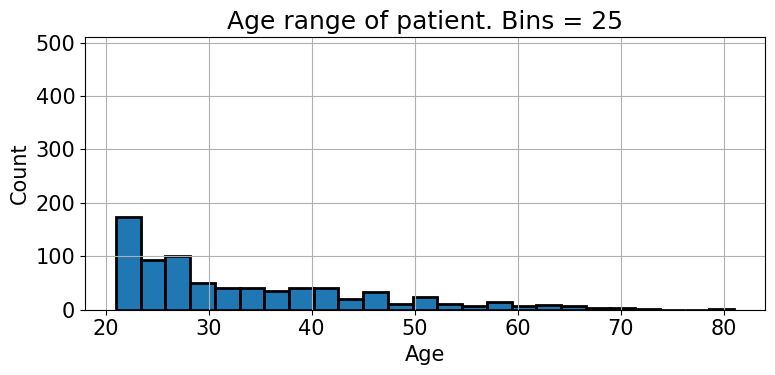

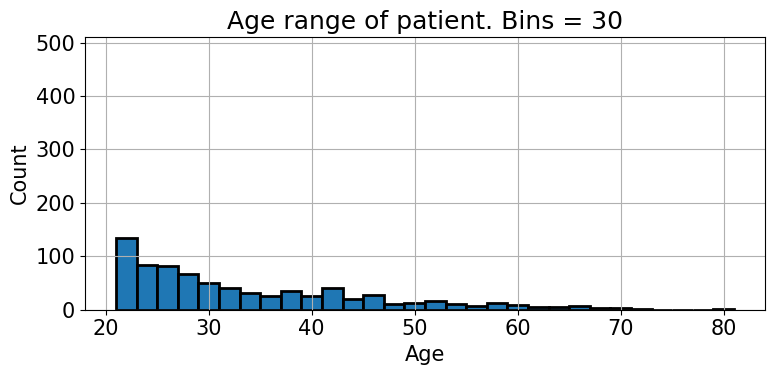

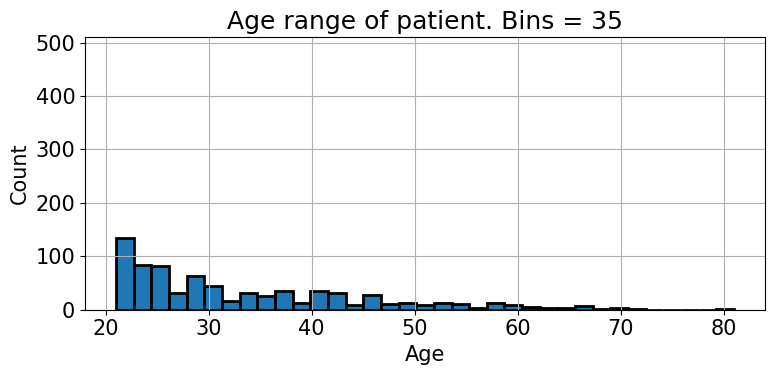

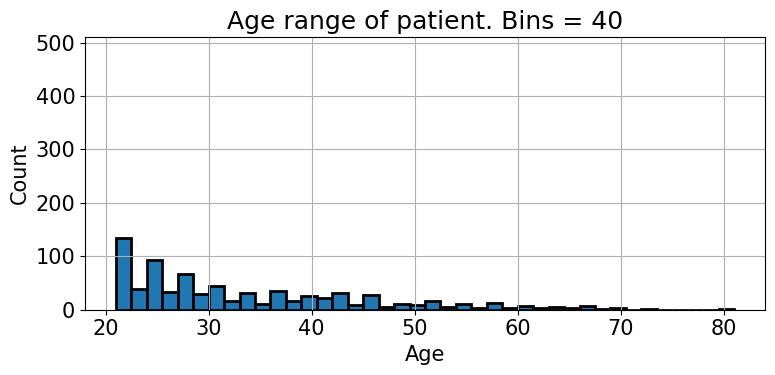

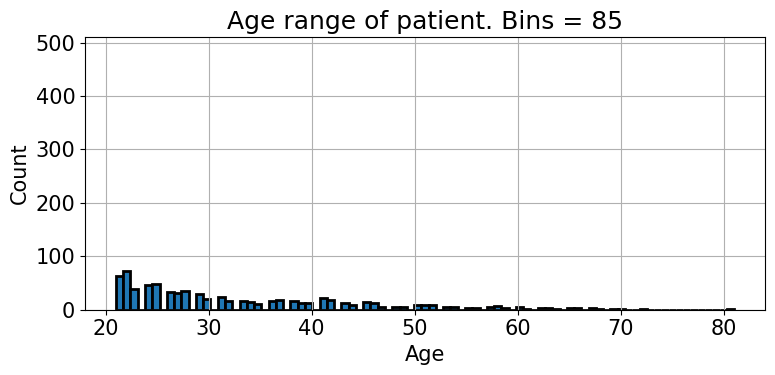

In [28]:
## TU CODIGO AQUI
binvalues = [20, 25, 30, 35, 40, 85]
for bin in binvalues:
    f = plt.figure(figsize=(8,4))
    ax = f.add_subplot(1,1,1)
    data["Age"].hist(ax=ax, edgecolor='black', linewidth=2, bins= bin)
    ax.set_title(f"Age range of patient. Bins = {bin}")
    ax.set_ylim([0, 510])
    ax.set_xlabel("Age")
    ax.set_ylabel("Count")
    f.tight_layout()


Si lograste resolver el ejercicio notarás las diferentes formas en la distribución. El número de conteo ha disminuido en cada bin también.

Es importante entender tus ejes *x* y *y* al hacer histogramas para que la misma forma no te engañe. El último bin es casi 9 veces más grande que los otros anchos de bins, de ahí que parezca que contiene muchos más pacientes.

### 3a: Ejercicio del reto 2

Prueba esto ahora: en lugar de especificar los bins en tu código, deja que Pandas maneje los bordes de cada bin. Crea el mismo histograma anterior usando `bins = 5` en lugar de 10.

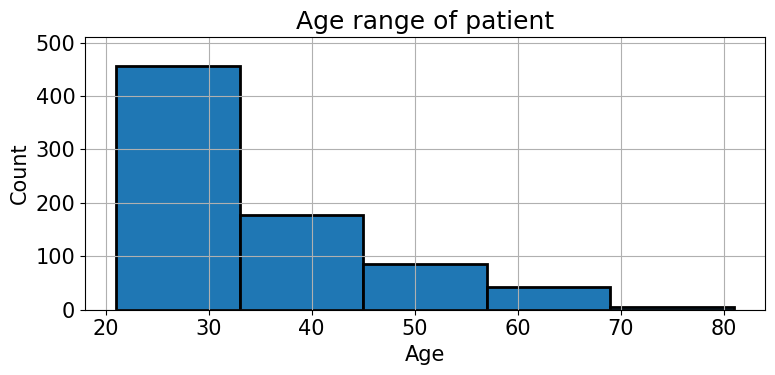

In [31]:
## TU CODIGO AQUI
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
data["Age"].hist(ax=ax, edgecolor='black', linewidth=2, bins= 5)
ax.set_title(f"Age range of patient")
ax.set_ylim([0, 510])
ax.set_xlabel("Age")
ax.set_ylabel("Count")
f.tight_layout()


¡Esta distribución es similar a la primera que generamos! Nota que todavía están igualmente espaciados, pero más gruesos.

Al hacer histogramas, es muy importante que entendamos cómo se distribuyen los datos, es decir, dónde se encuentran los valores más frecuentes.

### 3b: Representando patrones en tus datos - gráficas de dispersión (scatterplots)

Los histogramas muestran datos en conjunto de una manera conveniente basada en conteos. A veces, es posible que quieras ver cómo determinadas características (features) o columnas tienen relaciones entre sí.

Para hacer esto usamos un diagrama o gráfica de dispersión. Una gráfica de dispersión muestra cada punto de datos de su conjunto de datos como una relación entre dos features que especificas.

Recuerda que esto se hace tomando 2 columnas del dataset y graficando, para cada fila, el valor de $(f_1, f_2)$ donde $f$ representa un feature o columna en los ejes *x* y *y* respectivamente.

Crearemos una gráfica entre BloodPressure (x) y Age (y). Para esto asumimos que las personas jóvenes tiene presiones de sangre (BloodPressure) más bajas.

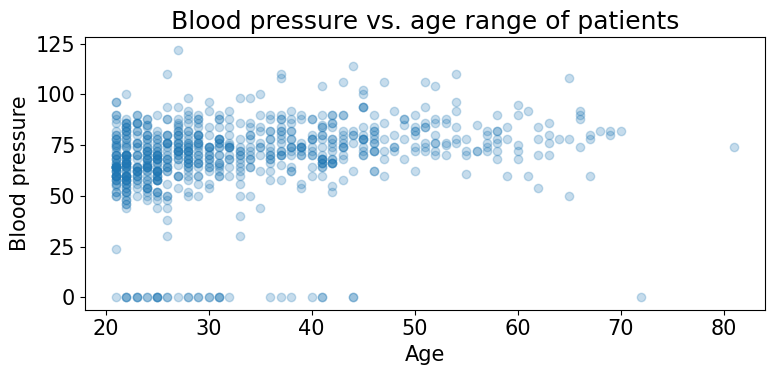

In [32]:
plt.rcParams['font.size'] = 15
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
ax.scatter(data["Age"], data["BloodPressure"], alpha=0.25)
ax.set_title("Blood pressure vs. age range of patients")
ax.set_ylabel("Blood pressure")
ax.set_xlabel("Age")
f.tight_layout()

¡Nota algo interesante aquí! ¡Hay varias personas con 0 presión arterial! Desde el punto de vista médico esto es muy extraño.

Los diagramas de dispersión nos ayudan a comprender cómo nuestros datos pueden tener información inapropiada o faltante. En el caso anterior, es poco probable que las personas tengan 0 presión arterial, pero es más probable que el profesional médico no tuviera estos datos listos o no se midieron. No queremos entrenar modelos con este tipo de información.

Para lo siguientes podemos considerar estos puntos como **outliers** or **anomalías**. Para este caso sería apropiado removerlas del dataset para asegurar que entrenamos nuestro modelo con solo los valores reportados completos.

Para realizar lo anterior usaremos Pandas para solo [seleccionar](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing) las filas de nuestro dataset donde BloodPressure > 0.

In [33]:
# Seleccionar las filas donde el valor es mayor a 0.
data = data[data["BloodPressure"] > 0]
print("Patients with blood pressure\n", data.shape) # Rows x Columns


Patients with blood pressure
 (733, 9)


Removimos 35 registros que tenían esta anomalía. Volvamos a gráficar y observar los datos.

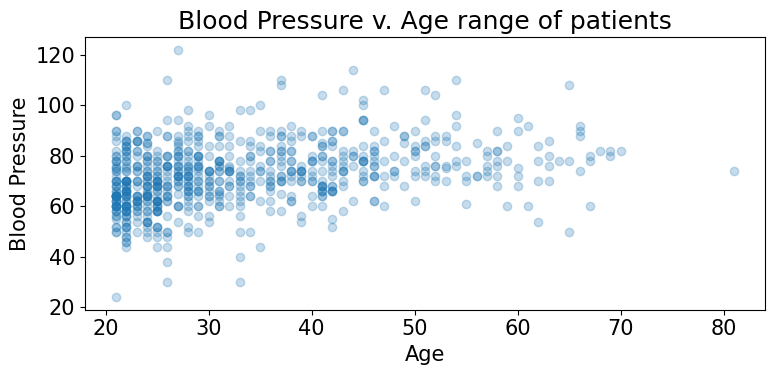

In [34]:
plt.rcParams['font.size'] = 15
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
ax.scatter(data["Age"], data["BloodPressure"], alpha=0.25)
ax.set_title("Blood Pressure v. Age range of patients")
ax.set_ylabel("Blood Pressure")
ax.set_xlabel("Age")
f.tight_layout() # Makes things pretty

Ahora podemos ver que tenemos una tendencia un poco más clara:

- Pacientes mayores tienden a tener más probabilidades de tener una presión arterial más alta.
- Pacientes más jóvenes pueden estar más dispersos.



### 3b: Ejercicio del reto 1

Demos un paso más allá. Grafica este análisis de la presión sanguínea considerando si las personas son o no diabéticas (`Outcome = 1` o `Outcome = 0`).

En el siguiente bloque de código primero te dejo el ejemplo de personas con diabetes. Realiza la segunda gráfica para personas sin diabetes.

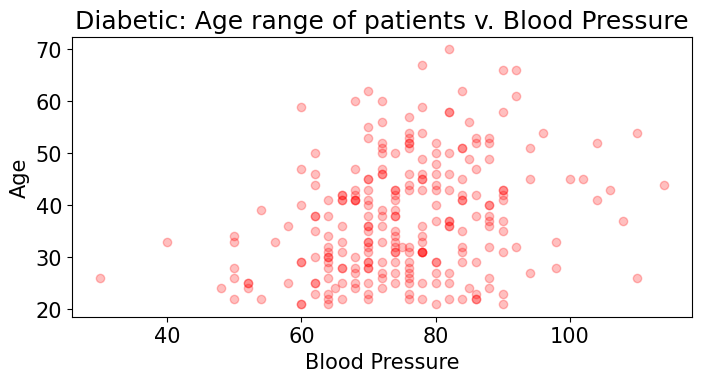

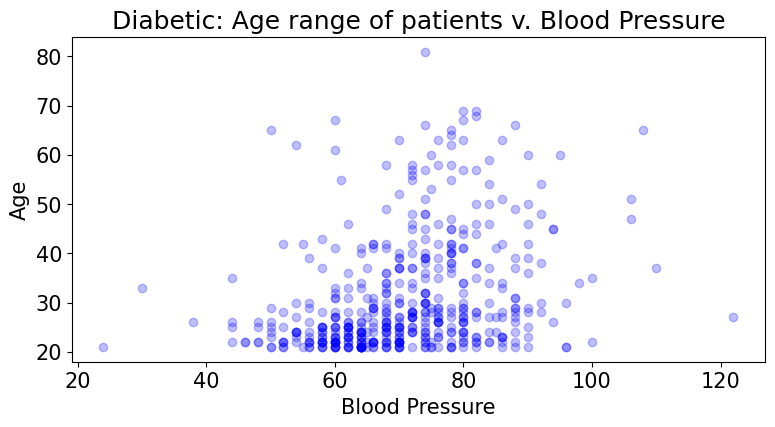

In [37]:
diabetic = data[data["Outcome"] == 1]
notdiabetic = data[data["Outcome"] == 0]

plt.rcParams['font.size'] = 15
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(2,1,1)
ax.scatter(diabetic["BloodPressure"], diabetic["Age"], alpha=0.25, c='r')
ax.set_title("Diabetic: Age range of patients v. Blood Pressure")
ax.set_ylabel("Age")
ax.set_xlabel("Blood Pressure")

## TU CODIGO AQUI
plt.rcParams['font.size'] = 15
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(2,1,1)
ax.scatter(notdiabetic["BloodPressure"], notdiabetic["Age"], alpha=0.25, c='b')
ax.set_title("Diabetic: Age range of patients v. Blood Pressure")
ax.set_ylabel("Age")
ax.set_xlabel("Blood Pressure")


f.tight_layout()

Comparte tus resultados en los comentarios de la clase. También deja tus observaciones: ¿Qué notas entre estas dos gráficas?

## 4: Preparándose para construir modelos de machine learning

For the last part of the notebook, we will discuss how to think about building a model for this dataset.

Broadly, machine learning algorithms can generally be categorized into 3 large domains: **supervised learning**, **unsupervised learning**, and **reinforcement learning**. Our course will cover the first two components.

Los algoritmos de machine learning se pueden clasificar en tres grandes dominios:

- **Aprendizaje supervisado**.
- **Aprendizaje no supervisado**.
-**Aprendizaje reforzado**.

Nuestro curso cubrirá las bases de los dos primeros.

### 4b: aprendizaje supervisado

Le pregunta a un modelo a a prender a cómo predecir una salida o outcome.

Hay dos tipos de outcomes: es posible que quieras predecir una etiqueta en particular o un valor numérico en particular. Esto es **clasificación** y **regresión** respectivamente.

### 4a: aprendizaje no supervisado

Le pregunta a un modelo a aprender cómo agrupar tus datos. No hay target o outcome que conozcas previamente.

Es muy útil cuando necesitas segmentar tus datos en categorías, o identificar los features o características para agrupaciones dentro de tus datos.

Típicamente se lleva a cabo con **clustering** o clusterización y con **dimensionality reduction** o reducción de dimensionalidad respecticamente.

---

Para nuestro dataset de diabetes queremos predecir si un paciente tiene o no este padecimiento.

Esto puede pensarse como etiquetas "Sí - tiene diabetes" o "No - no tiene diabetes". Por lo que este tipo de datos se beneficiaría de **clasificación con aprendizaje supervisado**.

### 4: Preguntas del reto

A continuación, te daré un par de ejemplos para tratar de comprender qué tipos de modelos debería utilizar. Responde en los comentarios de la clase a qué tipo de algoritmo se refiere la situación.

**Pregunta 1** <br>

Tienes un conjunto de datos de una empresa de ropa y deseas predecir el volumen de ventas de vestidos en el próximo mes. ¿Qué tipo de problema es? <br>

**Pregunta 2** <br>

Al igual que en la primera pregunta, estás utilizando un conjunto de datos de ropa. En lugar de predecir el volumen de ventas, querrás saber si venderás al menos 1000 de un determinado tipo de vestido. ¿Qué tipo de problema es este? <br>

**Pregunta 3** <br>

Tienes información sobre cómo compran ropa los clientes en tu tienda. Tienes un conjunto de datos de sus compras, segmentado en categorías: la cantidad de pantalones, camisas, vestidos y faldas que compra cada cliente. Deseas segmentar a tus clientes en diferentes grupos para poder enviar anuncios a cada grupo, según lo que quieran usar. ¿Qué tipo de problema podría ser este? <br>

## 5: Respuestas a ejercicios


### 2a. Preguntas del reto

**Pregunta 1** <br>

R= Categorical. <br>

**Pregunta 2** <br>

R= Numerical. <br>

**Pregunta 3** <br>

R= Numerical. <br>

### 3a: Ejercicio del reto 1

Pista:
```
binvalues = [20, 25, 30, 35, 40, 85]
bins = binvalues
```

In [ ]:
## Ejemplo, diferentes anchos de bins.
### RESPUESTA
binvalues = [20, 25, 30, 35, 40, 85]
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
data["Age"].hist(ax=ax, bins = binvalues, edgecolor='black', linewidth=2) # Ejemplo con bordes de bin.
ax.set_ylim([0, 510])
ax.set_title("Age range of patients")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
f.tight_layout()

### 3a: Ejercicio del reto 2

In [ ]:
## Ejemplo, diferentes anchos de bins.
### RESPUESTA
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
data["Age"].hist(ax=ax, bins = 5, edgecolor='black', linewidth=2) # Ejemplo con bins enteros.
ax.set_title("Age range of patients")
ax.set_ylim([0, 510])
ax.set_xlabel("Age")
ax.set_ylabel("Count")
f.tight_layout()

### 3b: Ejercicio del reto 1

In [ ]:
diabetic = data[data["Outcome"] == 1]
notdiabetic = data[data["Outcome"] == 0]

plt.rcParams['font.size'] = 15
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(2,1,1)
ax.scatter(diabetic["Age"], diabetic["BloodPressure"], alpha=0.25, c='r')
ax.set_title("Diabetic: Age range of patients v. Blood Pressure")
ax.set_xlabel("Age")
ax.set_ylabel("Blood Pressure")

## RESPUESTA
ax = f.add_subplot(2,1,2)
ax.scatter(notdiabetic["Age"], notdiabetic["BloodPressure"], alpha=0.25, c='b')
ax.set_title("Diabetic: Blood Pressure v. Age range of patients")
ax.set_ylabel("Blood Pressure")
ax.set_xlabel("Age")

f.tight_layout()

### 4: Preguntas del reto

**Pregunta 1** <br>

R= Supervisado - Regresión. <br>

**Pregunta 2** <br>

R= Supervisado - Clasificación. <br>

**Pregunta 3** <br>

R= Aprendizaje no supervisado - Clustering <br>